In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import sys
from PIL import Image, ImageDraw, ImageFont

In [2]:
# Read in data
moon = pd.read_csv('/Users/Jaahnavee/Documents/RA Regolith Thickness/Final Code and Data/New_Maps_New_CS_NRA.csv',
                   header=None)

# Drop negative values
moon = moon[moon[8] > 10**-15]

# Assign regions
high = moon[moon[4]==1]
mare = moon[moon[4]==0]

In [3]:
# Rename columns
moon = moon.rename(columns = {0:"Longitude", 1:"Latitude", 2:"Diameter_m", 3:"Diameter_km", 4:"Surface(0=Mare, 1=Highlands)", 5:"RA_min", 6:"RA_max", 7:"RA_mean", 8:"NRA"})
moon

,Longitude,Latitude,Diameter_m,Diameter_km,"Surface(0=Mare, 1=Highlands)",RA_min,RA_max,RA_mean,NRA
0,-179.83,-18.2510,98,0.098,1,0.001,0.005,0.002750,0.002250
1,-179.79,12.7980,355,0.355,1,0.002,0.110,0.020389,0.089611
2,-179.70,16.0560,144,0.144,1,0.002,0.010,0.003875,0.006125
3,-179.53,-6.7316,136,0.136,1,0.000,0.004,0.002125,0.001875
4,-179.37,20.0500,208,0.208,1,0.001,0.015,0.004400,0.010600
...,...,...,...,...,...,...,...,...,...
2255,178.15,-12.6200,106,0.106,1,0.002,0.008,0.004000,0.004000
2256,178.90,-27.7030,168,0.168,1,0.000,0.011,0.004313,0.006687
2257,179.00,-6.9515,243,0.243,1,0.001,0.028,0.008840,0.019160
2258,179.47,35.2150,103,0.103,1,0.002,0.007,0.003667,0.003333


In [4]:
# Data Summary
pd.DataFrame.describe(moon)

,Longitude,Latitude,Diameter_m,Diameter_km,"Surface(0=Mare, 1=Highlands)",RA_min,RA_max,RA_mean,NRA
count,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000
mean,-24.368012,2.063593,186.710177,0.186710,0.636283,0.001063,0.032930,0.007987,0.024943
std,94.939021,21.996595,137.386629,0.137387,0.481175,0.001336,0.047316,0.009345,0.039286
min,-179.830000,-49.900000,47.000000,0.047000,0.000000,0.000000,0.002000,0.001111,0.000167
25%,-97.300500,-13.891250,107.750000,0.107750,0.000000,0.000000,0.008000,0.003563,0.004111
50%,-33.634500,1.079600,150.000000,0.150000,1.000000,0.001000,0.015000,0.004917,0.010187
75%,42.708250,17.737000,222.250000,0.222250,1.000000,0.002000,0.036000,0.008533,0.028195
max,179.650000,49.382000,2311.000000,2.311000,1.000000,0.016000,0.437000,0.134380,0.404550


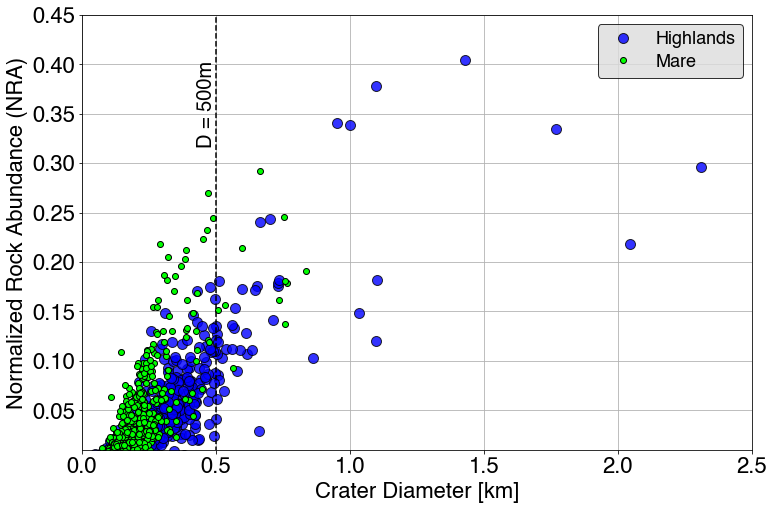

In [7]:
# RAW PLOT #

fig, ax = plt.subplots(figsize = (12,8))

# Highlands
plt.plot(high.iloc[:,3], high.iloc[:,8], 'o',
          markeredgecolor = 'k',
          markerfacecolor = 'b',
          markersize = 10,
          alpha = 0.8)

# Mare
plt.plot(mare.iloc[:,3], mare.iloc[:,8], '.',
          markeredgecolor = 'k',
          markerfacecolor = 'lime',
          markersize = 12,
          alpha = 1)

plt.xlabel('Crater Diameter [km]', fontsize=22)
plt.ylabel('Normalized Rock Abundance (NRA)', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(0, 2.5)
plt.ylim(0.01, 0.45)
plt.grid(which = 'major', linestyle = '-')
plt.grid(which = 'minor', linestyle = '--')

leg = plt.legend(['Highlands', 'Mare'],
                 loc=1, prop={'size': 18},
                 labelspacing = 0.3,
                 edgecolor = 'k', facecolor = 'gainsboro')


diameter = 0.50
percentage = 0.1

# Vertical Diameter Line
plt.plot([diameter, diameter], [10**-5, 10**0], 'k--')
plt.text(diameter-0.07, 0.32, 'D = '+str(int(diameter*1000))+'m', rotation = 90,
        fontsize = 20,
        weight = 'bold')

# Horizontal NRA Line
#plt.plot([0, 2.5], [percentage, percentage], 'k--')
#plt.text(1.6, percentage+0.009, 'NRA = '+str(int(percentage*100))+'%',
#        fontsize = 18,
#        weight = 'bold')

#plt.savefig('/Users/jaahnavee/Desktop/Figure5_1.jpg')

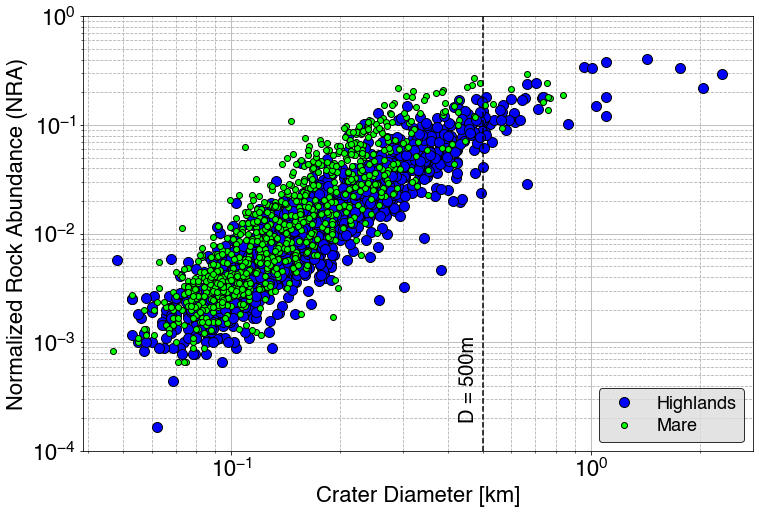

In [8]:
# LOG-LOG PLOT #

plt.rc('font', family = 'Helvetica')

mare_c = 'lime'
high_c = 'blue'
mare_cedge = 'k'
high_cedge = 'k'

fig, ax = plt.subplots(figsize = (12,8))

# Highlands
plt.loglog(high.iloc[:,3], high.iloc[:,8], 'o',
          markeredgecolor = high_cedge,
          markerfacecolor = high_c,
          markersize = 10,
          alpha = 1)

# Mare
plt.loglog(mare.iloc[:,3], mare.iloc[:,8], '.',
          markeredgecolor = mare_cedge,
          markerfacecolor = mare_c,
          markersize = 12,
          alpha = 1)

# Highlands Centroid
#plt.loglog(st.mean(high.iloc[:,3]), st.mean(high.iloc[:,8]), '^',
#          markeredgecolor = 'k',
#          markerfacecolor = 'gold',
#          markersize = 16,
#          markeredgewidth = 3)

# Mare Centroid
#plt.loglog(st.mean(mare.iloc[:,3]), st.mean(mare.iloc[:,8]), '^',
#          markeredgecolor = 'k',
#          markerfacecolor = 'pink',
#          markersize = 16,
#          markeredgewidth = 3)

plt.xlabel('Crater Diameter [km]', fontsize=22)
plt.ylabel('Normalized Rock Abundance (NRA)', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.grid(which = 'major', linestyle = '-')
plt.grid(which = 'minor', linestyle = '--')
plt.ylim([10**-4, 10**0])

# Legend
leg = plt.legend(['Highlands', 'Mare'],
                 loc=4, prop={'size': 18},
                 labelspacing = 0.3,
                 edgecolor = 'k', facecolor = 'gainsboro')

# Vertical Diameter Line
plt.plot([diameter, diameter], [10**-5, 10**1], 'k--')
plt.text(diameter-0.07, 2*10**-4, 'D = '+str(int(diameter*1000))+'m', rotation = 90,
        fontsize = 20,
        weight = 'bold')

#plt.savefig('/Users/jaahnavee/Desktop/Figure5_2.jpg')